This notebooks contains figures and analysis of the [value proposition 2 (grounding constructs on tasks)](https://www.notion.so/mortynia/VP2-Ground-constructs-on-tasks-a82e05b067dd49c883095ee0bf42cc5e).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('paper', 'whitegrid')  # noqa

from python.cogtext.datasets.pubmed import PubMedDataLoader

# load the data
PUBMED = PubMedDataLoader(preprocessed=False).load()

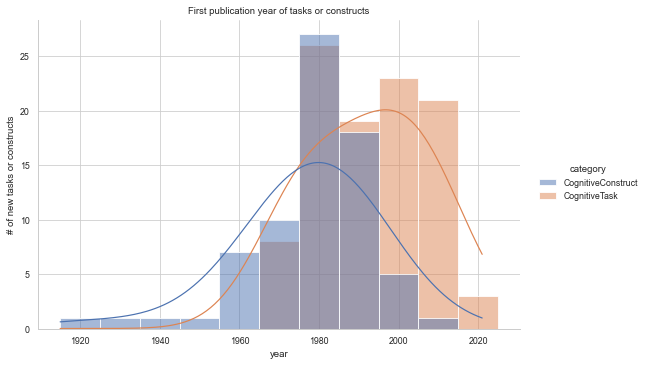

In [63]:
# figure 1: the year a construct or a task was first published

first_pub_years = PUBMED.groupby(['category','label'])['year'].min().reset_index()

# first_pub_years['year'] = first_pub_years['year'].astype('category')

g = sns.displot(
  data=first_pub_years,
  x='year',
  hue='category',
  aspect=1.5,
  binwidth=10,
  kde_kws={'bw_adjust': 2},
  kde=True)

g.set(
    xlabel='year',
    ylabel='# of new tasks or constructs',
    title='First publication year of tasks or constructs',
)

plt.show()

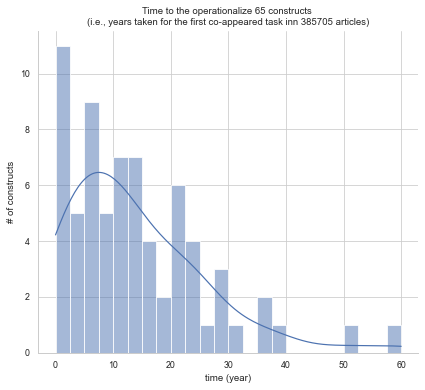

In [126]:
# figure 2: the first time a construct has been operationalized by a task in a publication


def first_task_year(articles):
  category = articles.name[0]
  if category == 'CognitiveTask':
    return np.nan
  
  first_pub_year = articles['year'].min().astype('int')
  
  first_task_year = PUBMED.query(
    'category == "CognitiveTask" and pmid in @articles.pmid'
  )['year'].min()
    
  #['year'].min().astype('int')
  
  return first_task_year - first_pub_year

times_to_task = PUBMED.groupby(['category','label']).apply(first_task_year).dropna()

n_operationalized_connstructs = times_to_task[times_to_task > 0].count()
n_articles = PUBMED['pmid'].nunique()

sns.displot(
  data=times_to_task,
  binwidth=2.5,
  aspect=1.2,
  kde=True).set(
    xlabel='time (year)',
    ylabel='# of constructs',
    title=f'Time to the operationalize {n_operationalized_connstructs} constructs \n'
          f'(i.e., years taken for the first co-appeared task inn {n_articles} articles)',
)

plt.show()